In [1]:
import pandas as pd

In [5]:
yt_df = pd.read_csv('youtube_video_details.csv')

In [6]:
yt_df.head()

,video_id,title,description,published_at,view_count,like_count,comment_count,duration
0,S8o8OwEJ3VQ,@KarolG | Si Antes Te Hubiera Conocido | Coke...,Watch the full Studio Session OUT NOW!,2024-06-26T14:16:31Z,124462,7346,81,PT16S
1,MXIspqX7WLc,Coke Studio: Live ft. NewJeans,Experience the magic of Coke Studio: Live feat...,2024-06-07T12:00:07Z,107077,8085,343,PT6M13S
2,DOEjWPgeoVI,@KarolG x Coke Studio coming soon. ❤️​,NaN,2024-06-03T16:05:05Z,2190,116,4,PT16S
3,_FGUexuihaA,@NewJeans_official | How Sweet | Coke Studio P...,Watch the full Studio Session OUT NOW! #CokeSt...,2024-05-24T15:05:06Z,211747,12008,194,PT16S
4,02xwcvM_yZs,Coke Studio x NewJeans Announcement,Something sweet is dropping May 24. 💖 @NewJean...,2024-05-20T15:09:23Z,5394,704,34,PT16S


Data Cleaning

In [8]:
yt_df['published_at'] = pd.to_datetime(yt_df['published_at'])

def parse_duration(duration):
    import isodate
    return isodate.parse_duration(duration).total_seconds()

yt_df['duration_seconds'] = yt_df['duration'].apply(parse_duration)

yt_df.head()

,video_id,title,description,published_at,view_count,like_count,comment_count,duration,duration_seconds
0,S8o8OwEJ3VQ,@KarolG | Si Antes Te Hubiera Conocido | Coke...,Watch the full Studio Session OUT NOW!,2024-06-26 14:16:31+00:00,124462,7346,81,PT16S,16.0
1,MXIspqX7WLc,Coke Studio: Live ft. NewJeans,Experience the magic of Coke Studio: Live feat...,2024-06-07 12:00:07+00:00,107077,8085,343,PT6M13S,373.0
2,DOEjWPgeoVI,@KarolG x Coke Studio coming soon. ❤️​,NaN,2024-06-03 16:05:05+00:00,2190,116,4,PT16S,16.0
3,_FGUexuihaA,@NewJeans_official | How Sweet | Coke Studio P...,Watch the full Studio Session OUT NOW! #CokeSt...,2024-05-24 15:05:06+00:00,211747,12008,194,PT16S,16.0
4,02xwcvM_yZs,Coke Studio x NewJeans Announcement,Something sweet is dropping May 24. 💖 @NewJean...,2024-05-20 15:09:23+00:00,5394,704,34,PT16S,16.0


In [13]:
yt_df.columns

Index(['video_id', 'title', 'description', 'published_at', 'view_count',
       'like_count', 'comment_count', 'duration', 'duration_seconds'],
      dtype='object')

In [14]:
yt_df.isna().sum()

video_id             0
title                0
description         15
published_at         0
view_count           0
like_count           0
comment_count        0
duration             0
duration_seconds     0
dtype: int64

EDA

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
yt_df['video_id'].value_counts().sum()

np.int64(146)

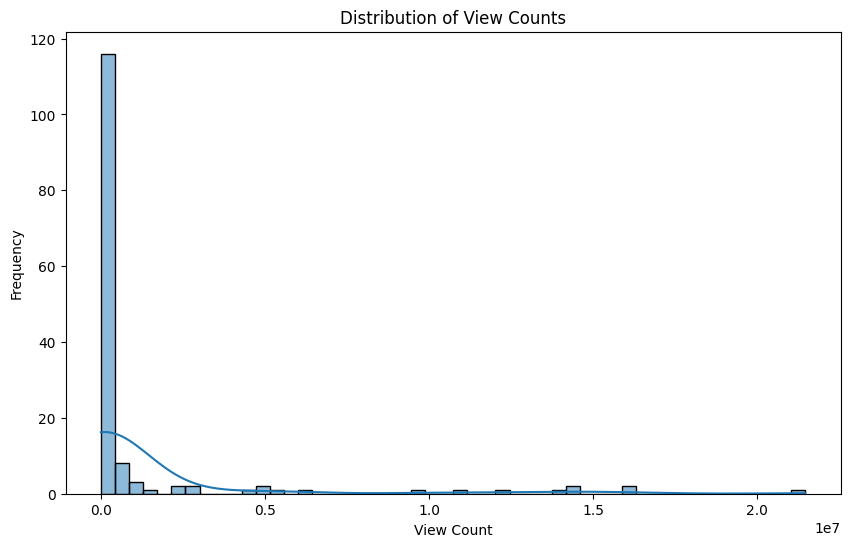

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(yt_df['view_count'], bins= 50, kde= True)
plt.title('Distribution of View Counts')
plt.xlabel('View Count')
plt.ylabel('Frequency')
plt.show()

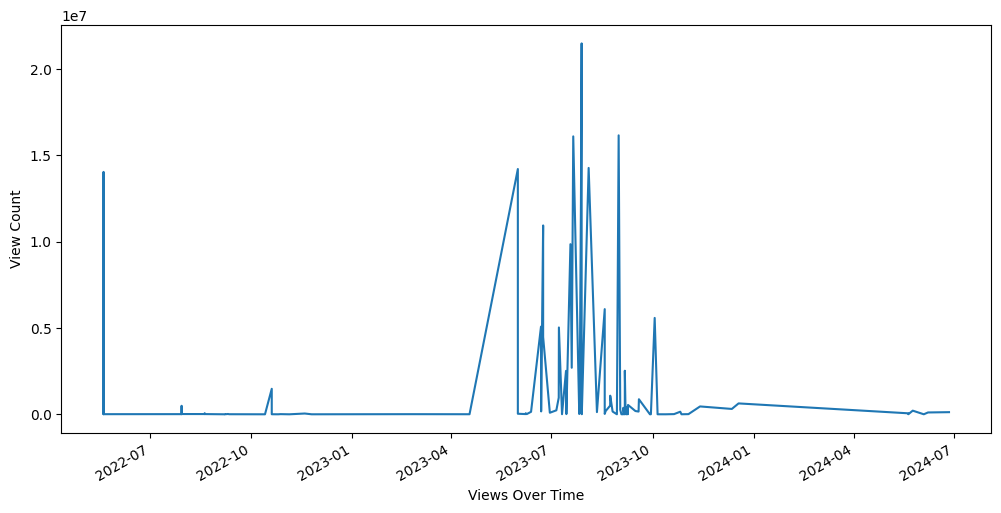

In [22]:
plt.figure(figsize=(12,6))
yt_df.set_index('published_at')['view_count'].plot()
plt.xlabel('Views Over Time')
plt.ylabel('Published Date')
plt.ylabel('View Count')
plt.show()

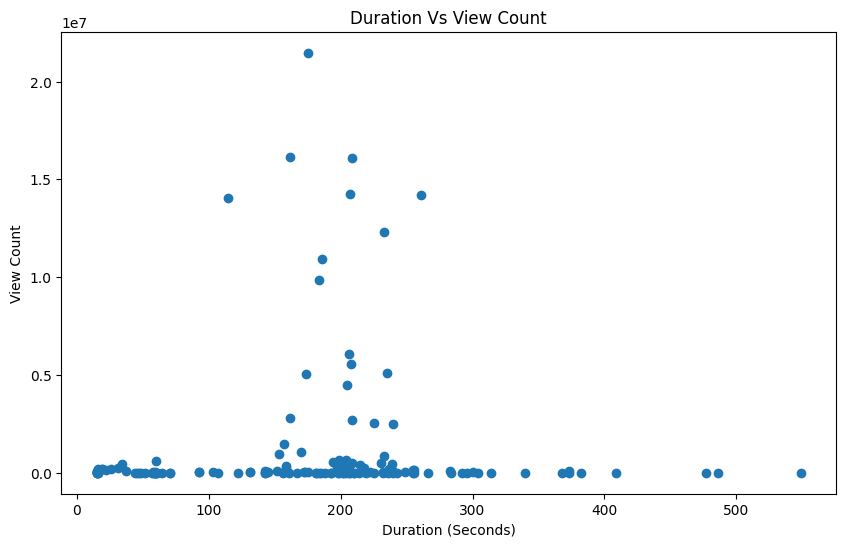

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(x = 'duration_seconds', y='view_count', data= yt_df)
plt.title('Duration Vs View Count')
plt.xlabel('Duration (Seconds)')
plt.ylabel('View Count')
plt.show()

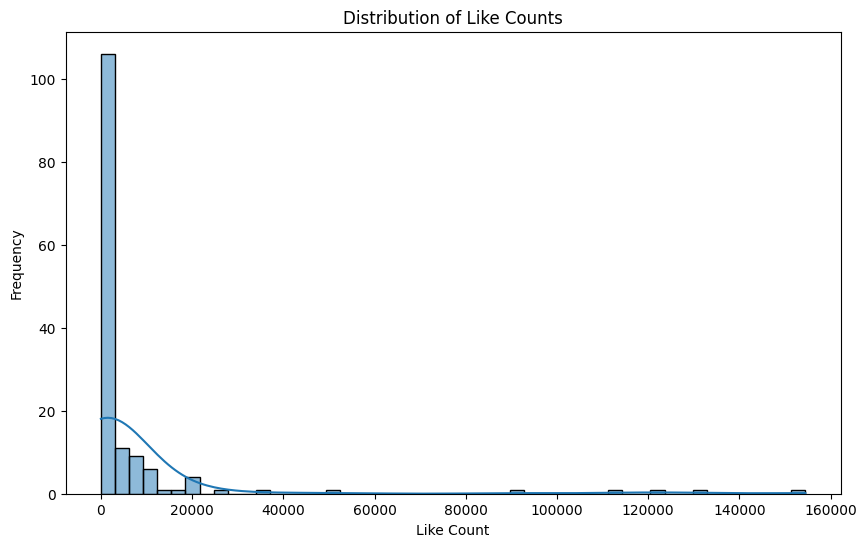

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(yt_df['like_count'], bins= 50, kde= True)
plt.title('Distribution of Like Counts')
plt.xlabel('Like Count')
plt.ylabel('Frequency')
plt.show()

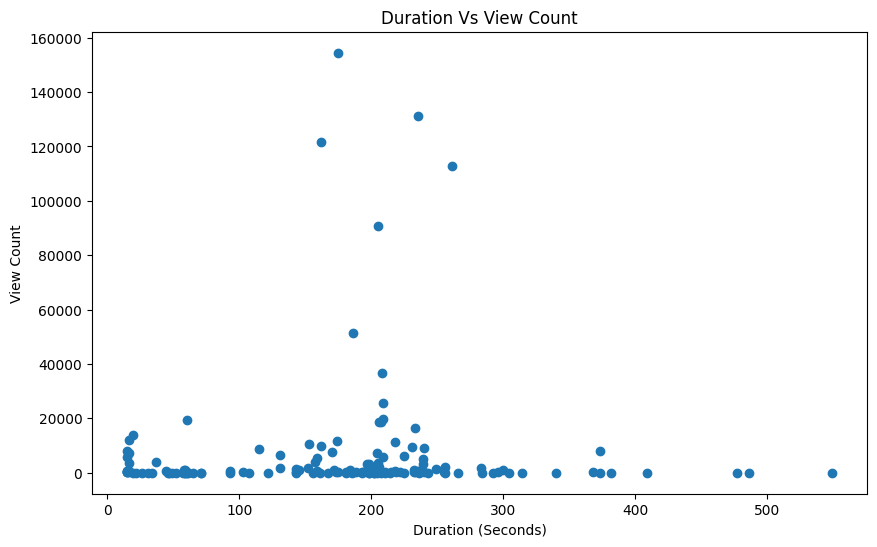

In [26]:
plt.figure(figsize=(10,6))
plt.scatter(x = 'duration_seconds', y='like_count', data= yt_df)
plt.title('Duration Vs View Count')
plt.xlabel('Duration (Seconds)')
plt.ylabel('View Count')
plt.show()

HYpothesis Testing

# Hypothesis : Longer video gets more views on average than shorter videos

In [29]:
from scipy import stats

In [30]:
# first we need to categorize the videos into longer and shorter by our metrics:
median_duration = yt_df['duration_seconds'].median()

long_videos = yt_df[yt_df['duration_seconds'] > median_duration]['view_count']  
short_videos = yt_df[yt_df['duration_seconds'] < median_duration]['view_count']

t_stat, p_value = stats.ttest_ind(long_videos, short_videos)

print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

T-Statistic: 0.11983754133100431, P-Value: 0.9047788748329499


# Hypothesis 2: Videos published on weekends get more views than those published on weekdays

In [33]:
yt_df['day_of_week'] = yt_df['published_at'].dt.dayofweek


weekend_view = yt_df[yt_df['day_of_week'] >= 5]['view_count']
weekday_views = yt_df[yt_df['day_of_week'] < 5]['view_count']

t_stat, p_value = stats.ttest_ind(weekend_view, weekday_views)

print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

T-Statistic: -0.8081420817684156, P-Value: 0.4203418356496661


Hypothesis Testing Results
Hypothesis: Longer videos get more views on average than shorter videos

T-Statistic: 0.1198
P-Value: 0.9048
The p-value is significantly higher than 0.05, indicating that we fail to reject the null hypothesis. There is no significant difference in the average number of views between longer and shorter videos.

Hypothesis: Videos published on weekends get more views than those published on weekdays

T-Statistic: -0.8081
P-Value: 0.4203
The p-value is also higher than 0.05, indicating that we fail to reject the null hypothesis. There is no significant difference in the average number of views between videos published on weekends and those published on weekdays.

# New Hypothesis: Videos with more likes get more views
Hypothesis Statement:

**Null Hypothesis (H0)**: There is no significant difference in the number of views between videos with high likes and videos with low likes.


**Alternative Hypothesis (H1)**: Videos with more likes have significantly higher views than videos with fewer likes.

In [34]:
median_likes = yt_df['like_count'].median()

high_likes = yt_df[yt_df['like_count'] > median_likes]['view_count']
low_likes = yt_df[yt_df['like_count'] <= median_likes]['view_count']

In [36]:
# Perform t-test
t_stat, p_value = stats.ttest_ind(high_likes, low_likes, alternative='greater')

print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

alpha = 0.05
if p_value <= alpha:
    print("Reject the null hypothesis: Videos with more likes have significantly higher views.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the number of views between videos with high likes and low likes.")


T-Statistic: 4.173671651839727, P-Value: 2.5813538034628123e-05
Reject the null hypothesis: Videos with more likes have significantly higher views.
